In [1]:
import tensorflow as tf
import numpy as np
import requests
import random
import matplotlib.pyplot as plt
import os
from urllib.request import urlretrieve

2025-04-29 22:31:22.544236: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745946082.580045    2728 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745946082.589302    2728 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745946082.621342    2728 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745946082.621376    2728 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745946082.621380    2728 computation_placer.cc:177] computation placer alr

In [126]:
class_names = ['Airplane', 'Apple', 'Bicycle', 'Book', 'Car', 'Cat', 'Chair', 'Clock', 'Dog', 'Door', 'Eye', 'Fish', 'Flower', 'Fork', 'House', 'Key', 'Ladder', 'Moon', 'Mountain', 'Pizza', 'Rainbow', 'Shoe', 'Smiley Face', 'Star', 'Stop Sign', 'Sun', 'Table', 'Tennis Racquet', 'Tree', 'Wheel']

# Download dataset (approx 50MB)
base_url = "https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/"

def download_data(class_name):
    url = base_url + class_name.replace(' ', '%20') + '.npy'
    path = os.path.join('quickdraw_data_npy', f'{class_name}.npy')
    if not os.path.exists(path):
        urlretrieve(url, path)
    return np.load(path, allow_pickle=True)


selected_classes = random.sample(class_names, 3)  # pick 3 classes for variety
test_images = []
test_labels = []

for cls in selected_classes:
    data = download_data(cls)
    idx = random.randint(0, len(data) - 1)
    img = data[idx].reshape(28, 28, 1)
    img = img / 255.0
    test_images.append(img)
    test_labels.append(cls)

print("Image resized and saved in test_image variable.")
print(test_labels)

Image resized and saved in test_image variable.
['Eye', 'Fish', 'Tree']


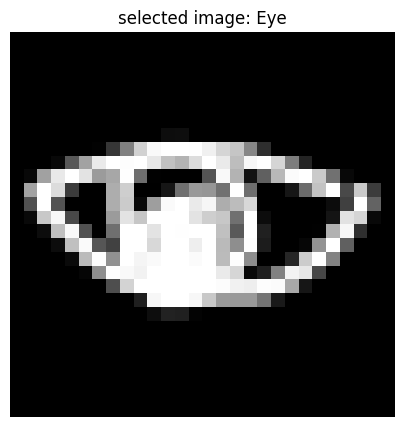

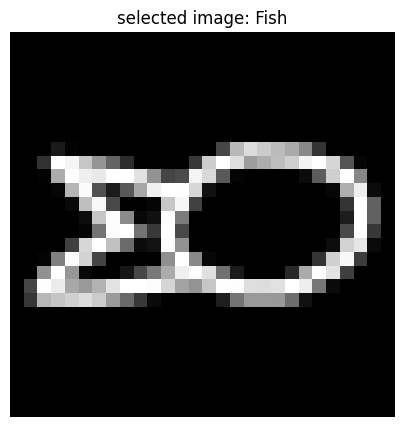

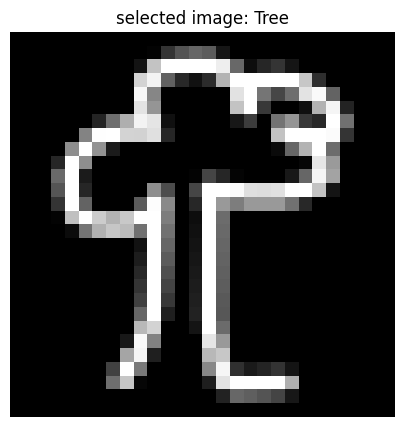

In [127]:
for test_image, test_label in zip(test_images, test_labels):
    # Display the image
    plt.figure(figsize=(5,5))
    plt.imshow(test_image.squeeze(), cmap='gray')
    plt.title(f"selected image: {test_label}")
    plt.axis('off')
    plt.show()

In [ ]:
# Load the EfficientNet model
model_path = os.path.join('models/CNN', 'best_model.h5')
model = tf.keras.models.load_model(model_path)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 27, 27, 32)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 27, 27, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 12, 12, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 5, 5, 128)      │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 5, 5, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 453,228 (1.73 MB)

 Trainable params: 452,778 (1.73 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 2 (12.00 B)

In [129]:
for img, label in zip(test_images, test_labels):
    predictions = model.predict(np.expand_dims(img, axis=0))
    top_idx = np.argmax(predictions)
    print(f"True class: {label}, Predicted: {class_names[top_idx]}, Confidence: {predictions[0][top_idx]:.4f}")
print(predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
True class: Eye, Predicted: Book, Confidence: 0.5377
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
True class: Fish, Predicted: Door, Confidence: 0.8657
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
True class: Tree, Predicted: Cat, Confidence: 1.0000
[[1.3810807e-19 5.1640440e-22 6.0464041e-18 3.4909955e-15 6.3978345e-25
  1.0000000e+00 3.6163750e-24 1.4868433e-24 1.7568731e-19 2.1337432e-14]]
